<a href="https://colab.research.google.com/github/trusso5/ds1002-stx3xt/blob/main/Final_lab1_ftx_stock_pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS1002 Lab 1: Python

In this lab you will work with a dataset, writing python to generate the deliverables specified in the cells below.

> **FTX** was a cryptocurrency exchange founded by Sam Bankman-Fried that saw both a spectacular rise and collapse between 2021 and 2022. At one point it had a valuation of $32B. Bankman-Fried was recently found guilty on seven counts of fraud and conspiracy.

The dataset for this assignment covers that rise and fall from the viewpoint of daily stock closing prices for FTX (ticker symbol `FTT`).

Answer the questions below with the appropriate Python code. Point assignments are indicated for each section. There are 15 total points possible for this lab, which counts as 5% of your overall grade. There is a 1-point extra credit option at the end.

Useful reference material:
- [Pandas Review](https://colab.research.google.com/github/nmagee/ds1002/blob/main/notebooks/pandas-review.ipynb) notebook.
- [Charts Reference](https://colab.research.google.com/github/nmagee/ds1002/blob/main/notebooks/charts-in-colaboratory.ipynb) notebook.
- [Plots Walkthrough](https://colab.research.google.com/github/nmagee/ds1002/blob/main/notebooks/plotting-examples.ipynb)

## Group Submissions

If you are working in a group to complete this lab, you may have no more than 3 members to a group. Group members should be indicated in the cell below -- list both names and UVA computing IDs.

Each student should then submit **the same URL** for the lab in Canvas. (If a group has Member1, Member2, and Member3, only one member needs to save the completed work back to GitHub and all members should submit that URL for grading.)

In [ ]:
# List group members (if applicable). Identify names and computing IDs
#
# Name                    Computing ID

## 1. Load Libraries & Data (3 pts)

https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv

Import any necessary libraries and load the remote CSV file below into a DataFrame. **Resolve any import issues you need to.**

In [1]:
import pandas as pd

ftx = "https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv"
ftx

df = pd.read_csv(ftx)
df = pd.read_csv(ftx, sep=';')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 741 entries, 0 to 740
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timeOpen   741 non-null    object 
 1   timeClose  741 non-null    object 
 2   timeHigh   741 non-null    object 
 3   timeLow    741 non-null    object 
 4   open       741 non-null    float64
 5   high       741 non-null    float64
 6   low        741 non-null    float64
 7   close      741 non-null    float64
 8   volume     741 non-null    float64
 9   marketCap  741 non-null    float64
 10  timestamp  741 non-null    object 
dtypes: float64(6), object(5)
memory usage: 63.8+ KB


## 2. Get Summary Data (1 pt)

In code, display how many rows and columns are in the raw dataset.

In [2]:
df.value_counts()

timeOpen                  timeClose                 timeHigh                  timeLow                   open       high       low        close      volume        marketCap     timestamp               
2021-04-29T00:00:00.000Z  2021-04-29T23:59:59.999Z  2021-04-29T12:54:03.000Z  2021-04-29T20:08:03.000Z  52.904941  54.265197  50.865821  52.459082  1.126720e+08  4.949355e+09  2021-04-29T23:59:59.999Z    6
2021-09-16T00:00:00.000Z  2021-09-16T23:59:59.999Z  2021-09-16T00:10:03.000Z  2021-09-16T20:54:03.000Z  71.161896  71.519686  66.035973  67.482300  4.886910e+08  8.150206e+09  2021-09-16T23:59:59.999Z    3
2022-12-17T00:00:00.000Z  2022-12-17T23:59:59.999Z  2022-12-17T00:24:00.000Z  2022-12-17T02:31:00.000Z  1.143108   1.165794   1.013767   1.079141   1.227145e+07  3.549241e+08  2022-12-17T23:59:59.999Z    3
2022-08-05T00:00:00.000Z  2022-08-05T23:59:59.999Z  2022-08-05T23:58:00.000Z  2022-08-05T01:03:00.000Z  29.134555  30.754532  29.112678  30.749505  7.994302e+07  4.142014e+09  2022-

## 3. Clean and Organize the Data (3 pts)

Check for data quality.

- Resolve any empty values or duplicate rows.
- Order the data properly if necessary.
- Drop the following columns and save the dataframe: `timeOpen`, `timeClose`, `timeHigh`, `timeLow`, `marketCap`,



In [ ]:
print(df.columns)
df = df.drop_duplicates()
df = df.sort_values("timestamp")
df = df.drop(columns=["timeOpen", "timeClose", "timeHigh", "timeLow", "marketCap"])
df

Index(['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'open', 'high', 'low',
       'close', 'volume', 'marketCap', 'timestamp'],
      dtype='object')


,open,high,low,close,volume,timestamp
739,6.201133,7.007523,6.171834,6.923968,31046652.87,2021-01-03T23:59:59.999Z
738,6.948680,7.632146,6.358218,7.514079,40526109.15,2021-01-04T23:59:59.999Z
737,7.528216,8.714947,7.081120,8.664688,49479278.39,2021-01-05T23:59:59.999Z
736,8.671285,9.390797,8.425946,9.390797,31404627.93,2021-01-06T23:59:59.999Z
735,9.386493,10.004872,9.215244,9.562131,46303336.73,2021-01-07T23:59:59.999Z
...,...,...,...,...,...,...
4,0.931138,0.955402,0.916414,0.923668,4574953.05,2022-12-27T23:59:59.999Z
3,0.921162,0.925702,0.869842,0.886091,4192949.85,2022-12-28T23:59:59.999Z
2,0.885723,0.887118,0.843029,0.860231,3766979.57,2022-12-29T23:59:59.999Z
1,0.860193,0.864752,0.826643,0.839048,3608615.07,2022-12-30T23:59:59.999Z


Now display the first 10 rows of the cleaned dataset.

In [ ]:
df.head(10)

,open,high,low,close,volume,timestamp
739,6.201133,7.007523,6.171834,6.923968,3.104665e+07,2021-01-03T23:59:59.999Z
738,6.948680,7.632146,6.358218,7.514079,4.052611e+07,2021-01-04T23:59:59.999Z
737,7.528216,8.714947,7.081120,8.664688,4.947928e+07,2021-01-05T23:59:59.999Z
736,8.671285,9.390797,8.425946,9.390797,3.140463e+07,2021-01-06T23:59:59.999Z
735,9.386493,10.004872,9.215244,9.562131,4.630334e+07,2021-01-07T23:59:59.999Z
734,9.569239,9.726429,8.452265,9.380988,4.228627e+07,2021-01-08T23:59:59.999Z
733,9.370450,9.636120,8.728044,9.570511,2.849895e+07,2021-01-09T23:59:59.999Z
732,9.571917,9.944797,8.657147,9.308809,3.101239e+07,2021-01-10T23:59:59.999Z
731,9.298315,9.298315,7.126050,8.610997,1.013024e+08,2021-01-11T23:59:59.999Z
730,8.615143,9.097479,8.040916,8.381133,2.674536e+07,2021-01-12T23:59:59.999Z


## 4. Calculate Daily Gains/Losses (2 pts)

Using Pandas, add a new column named `["close_change"]` to the dataframe that calculates the difference between daily closing prices for FTX. This will result in positive (growth) and negative (loss) values.

Note:
- Be careful about how you calculate this. Each row should calculate that difference from the row above it, which must be the previous calendar day.
- Reference code for this is available in the [Pandas Review](https://colab.research.google.com/github/nmagee/ds1002/blob/main/notebooks/pandas-review.ipynb) notebook. Hint: It is not complicated and does not require a for-loop.

In [ ]:
df["close_change"] = df["close"].diff()
df

,open,high,low,close,volume,timestamp,close_change
739,6.201133,7.007523,6.171834,6.923968,31046652.87,2021-01-03T23:59:59.999Z,NaN
738,6.948680,7.632146,6.358218,7.514079,40526109.15,2021-01-04T23:59:59.999Z,0.590111
737,7.528216,8.714947,7.081120,8.664688,49479278.39,2021-01-05T23:59:59.999Z,1.150608
736,8.671285,9.390797,8.425946,9.390797,31404627.93,2021-01-06T23:59:59.999Z,0.726110
735,9.386493,10.004872,9.215244,9.562131,46303336.73,2021-01-07T23:59:59.999Z,0.171334
...,...,...,...,...,...,...,...
4,0.931138,0.955402,0.916414,0.923668,4574953.05,2022-12-27T23:59:59.999Z,-0.007028
3,0.921162,0.925702,0.869842,0.886091,4192949.85,2022-12-28T23:59:59.999Z,-0.037577
2,0.885723,0.887118,0.843029,0.860231,3766979.57,2022-12-29T23:59:59.999Z,-0.025860
1,0.860193,0.864752,0.826643,0.839048,3608615.07,2022-12-30T23:59:59.999Z,-0.021183


## 5. Identify Growth Days (1 pt)

Based on the daily change in closing prices calculated above, identify the top 10 days of positive growth for FTX.

Display your results in a table showing both the rate of change and their dates.

In [ ]:
df2 = df.sort_values("close_change", ascending=False)

df2 = df2.drop(columns=["open", "high", "low", "close", "volume"])

df2.head(10)

,timestamp,close_change
492,2021-09-01T23:59:59.999Z,16.677156
487,2021-09-06T23:59:59.999Z,9.800320
692,2021-02-19T23:59:59.999Z,8.335900
592,2021-05-24T23:59:59.999Z,6.333923
673,2021-03-09T23:59:59.999Z,5.529699
515,2021-08-09T23:59:59.999Z,5.325192
485,2021-09-08T23:59:59.999Z,5.239728
625,2021-04-26T23:59:59.999Z,4.504385
611,2021-05-05T23:59:59.999Z,4.488174
311,2022-02-28T23:59:59.999Z,4.401841


## 6. Calculate the % Rate of Change (2 pts)

Next, create a new column named `["rate_of_change"]` based on `["close_change"]`.

Use the Pandas Review notebook for reference. Again, this is an easy operation in Pandas and does not require a for-loop.

In [ ]:
df["rate_of_change"] = df["close_change"].pct_change() * 100
df

,open,high,low,close,volume,timestamp,close_change,rate_of_change
739,6.201133,7.007523,6.171834,6.923968,31046652.87,2021-01-03T23:59:59.999Z,NaN,NaN
738,6.948680,7.632146,6.358218,7.514079,40526109.15,2021-01-04T23:59:59.999Z,0.590111,NaN
737,7.528216,8.714947,7.081120,8.664688,49479278.39,2021-01-05T23:59:59.999Z,1.150608,94.981723
736,8.671285,9.390797,8.425946,9.390797,31404627.93,2021-01-06T23:59:59.999Z,0.726110,-36.893427
735,9.386493,10.004872,9.215244,9.562131,46303336.73,2021-01-07T23:59:59.999Z,0.171334,-76.403895
...,...,...,...,...,...,...,...,...
4,0.931138,0.955402,0.916414,0.923668,4574953.05,2022-12-27T23:59:59.999Z,-0.007028,-119.501475
3,0.921162,0.925702,0.869842,0.886091,4192949.85,2022-12-28T23:59:59.999Z,-0.037577,434.659318
2,0.885723,0.887118,0.843029,0.860231,3766979.57,2022-12-29T23:59:59.999Z,-0.025860,-31.181678
1,0.860193,0.864752,0.826643,0.839048,3608615.07,2022-12-30T23:59:59.999Z,-0.021183,-18.085004


## 7. Identify Greatest % Change Days (1 pt)

In [ ]:
df["rate_abs"] = df["rate_of_change"].abs()
df3 = df.sort_values("rate_abs", ascending=False)

df3 = df3.drop(columns=["open", "high", "low", "close", "volume", "close_change", "rate_abs"])

df3.head(5)

,timestamp,rate_of_change
372,2021-12-28T23:59:59.999Z,61232.673968
443,2021-10-18T23:59:59.999Z,-26274.472913
190,2022-06-28T23:59:59.999Z,-16423.824562
55,2022-11-08T23:59:59.999Z,12983.555124
236,2022-05-13T23:59:59.999Z,11790.885259


Based on the rate change column calculated above, identify the top 5 days of greatest rate changes, whether positive or negative.

Display your results in a table showing both the rate of change and their dates.

## 8. Plot the Data (2 pts)

Finally, create two separate plots of the data -- one for the daily closing price and one for the daily gains/losses. These can be histograms or line plots.

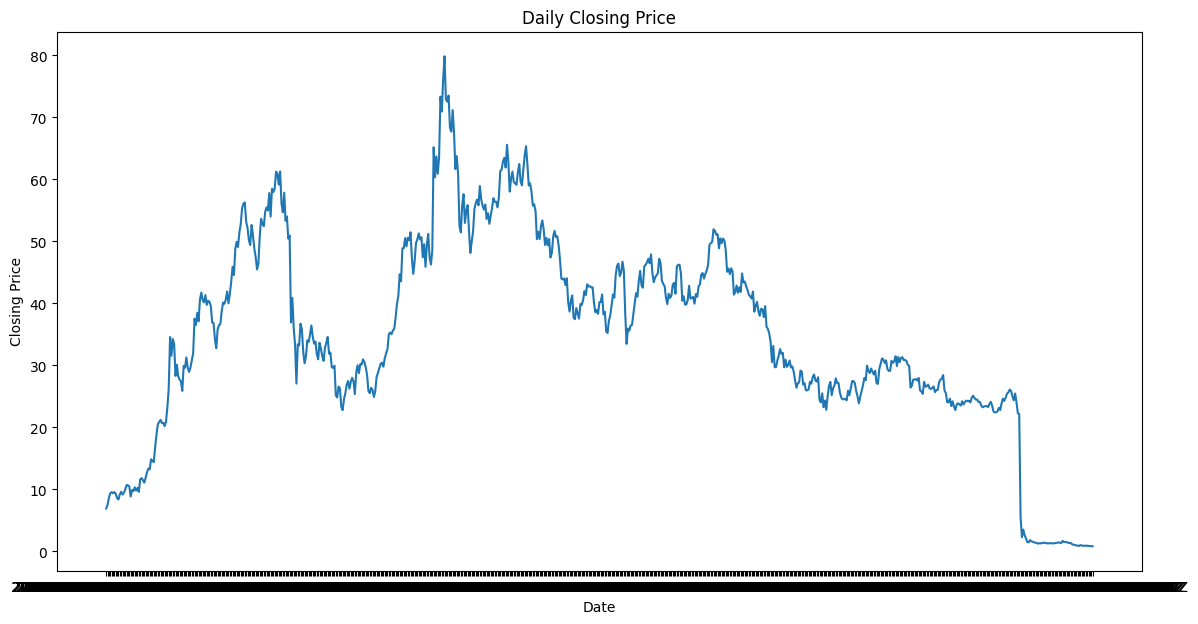

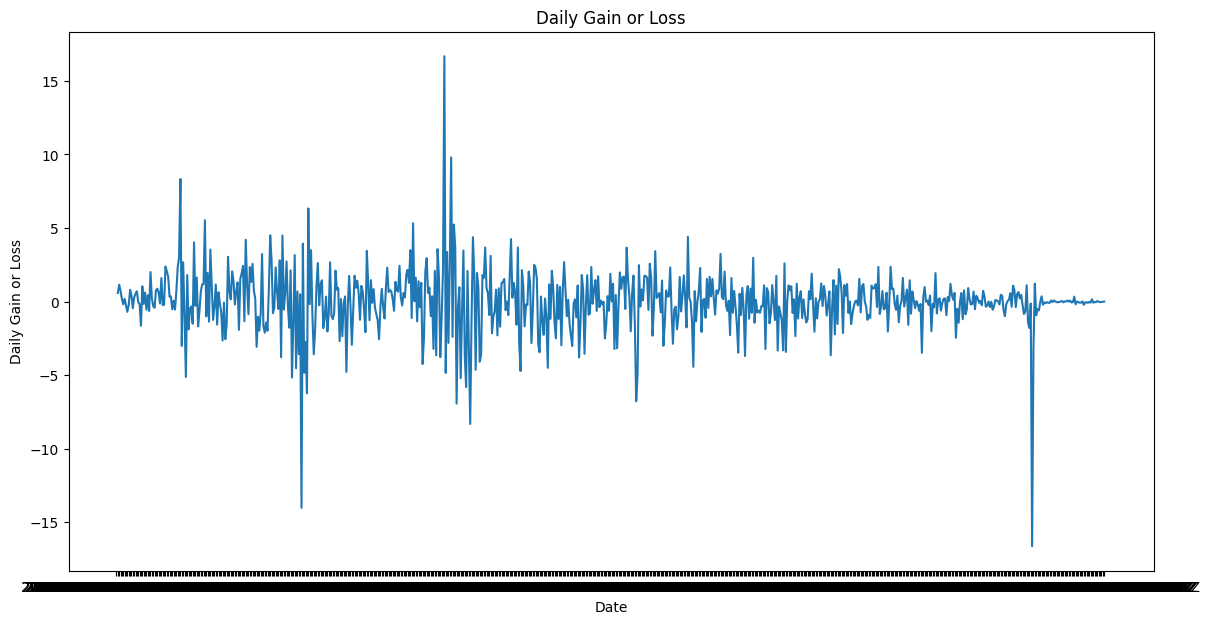

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(df['timestamp'], df['close'])
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Daily Closing Price')
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(df['timestamp'], df['close_change'])
plt.xlabel('Date')
plt.ylabel('Daily Gain or Loss')
plt.title('Daily Gain or Loss')
plt.show()

## BONUS! (1 pt)

Combine the two plots from #8 above into a single plot, displaying both together. Your plot should have two Y-axis scales, should differentiate the two values by color, and should include a legend.